In [25]:
# Import necessary libraries
import numpy as np
import math
import random as rand
import matplotlib.pyplot as plt

# Generating a toy dataset.
# DO NOT MODIFY THIS PART

paras = list((rand.random() - 0.5 for _ in range(13)))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def y_gen(x):
    h_11 = sigmoid(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = sigmoid(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = sigmoid(paras[6] * x[0] + paras[7] * x[1] + paras[8])
    h_21 = sigmoid(paras[9] * h_11 + paras[10] * h_12 + paras[11] * h_13 + paras[12])
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

from sklearn.model_selection import train_test_split

r = 0.2
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=r)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=r)

# (b) Generate the neural network structure
input_size = 2
L1_size = 3
L2_size = 1

Epoch 0/300, Train Loss: [0.02207248], Valid Loss: [0.00473325]
Epoch 20/300, Train Loss: [0.01472059], Valid Loss: [0.0035191]
Epoch 40/300, Train Loss: [0.00405762], Valid Loss: [0.00093673]
Epoch 60/300, Train Loss: [0.00163747], Valid Loss: [0.00029526]
Epoch 80/300, Train Loss: [0.00136906], Valid Loss: [0.00020263]
Epoch 100/300, Train Loss: [0.00133467], Valid Loss: [0.00018384]
Epoch 120/300, Train Loss: [0.00132877], Valid Loss: [0.0001786]
Epoch 140/300, Train Loss: [0.00132681], Valid Loss: [0.00017678]
Epoch 160/300, Train Loss: [0.00132552], Valid Loss: [0.00017604]
Epoch 180/300, Train Loss: [0.00132445], Valid Loss: [0.00017569]
Epoch 200/300, Train Loss: [0.00132351], Valid Loss: [0.00017549]
Epoch 220/300, Train Loss: [0.00132266], Valid Loss: [0.00017535]
Epoch 240/300, Train Loss: [0.00132191], Valid Loss: [0.00017525]
Epoch 260/300, Train Loss: [0.00132122], Valid Loss: [0.00017516]
Epoch 280/300, Train Loss: [0.0013206], Valid Loss: [0.00017509]


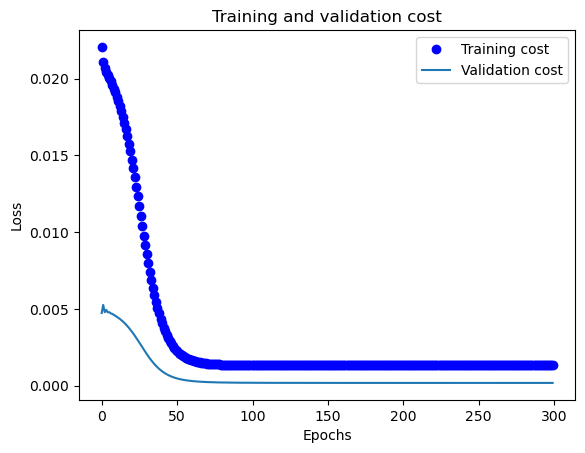

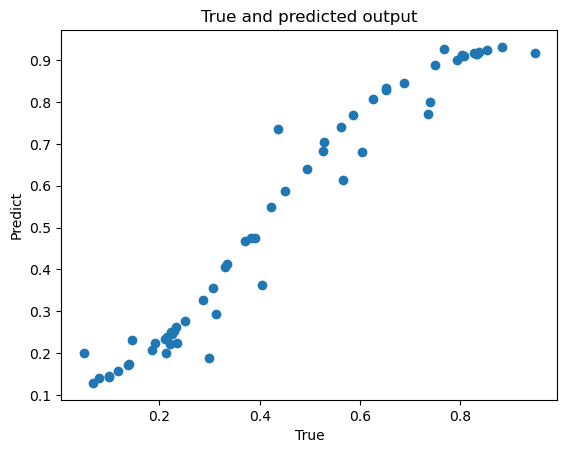

In [26]:
def sigmoid_derivative(x):
    return x * (1 - x)

# Forward propagation
def hidden_layer_function(X, weights, biases):
    inputs = np.dot(X, weights) + biases
    outputs = sigmoid(inputs)
    return outputs

def forward(X, L1_weights, L1_biases, L2_weights, L2_biases):
    L1_outputs = hidden_layer_function(X, L1_weights, L1_biases)
    y_hat = hidden_layer_function(L1_outputs, L2_weights, L2_biases)
    return y_hat

# Compute loss
def compute_loss(y, y_hat):
    sum = 0
    for i in range(len(y_hat)):
        sum += 1/2 * ((y[i] - y_hat[i]) ** 2)
    return sum / n

# Backpropagation
def backward(X, y, y_hat, learning_rate, L1_weights, L1_biases, L2_weights, L2_biases):
    # Calculate partial derivatives for output layer's weights
    dL_dh2 = y_hat - y
    dh2_da2 = sigmoid_derivative(y_hat)
    dL_da2 = dL_dh2 * dh2_da2
    
    # Update weights for the hidden-to-output layer
    L1_outputs = hidden_layer_function(X, L1_weights, L1_biases)
    #print("H1", L1_outputs)
    for i in range(L1_size):
        L2_weights[i][0] -= learning_rate * dL_da2 * L1_outputs[i]
    L2_biases[0] -= learning_rate * dL_da2
    
    # Calculate partial derivatives for hidden layer's weights
    for i in range(input_size):
        for j in range(L1_size):
            da2_dh1 = L2_weights[j][0]
            dh1_da1 = sigmoid_derivative(L1_outputs[j])
            da1_dw1 = X[i]
            
            L1_weights[i][j] -= learning_rate * dL_da2 * da2_dh1 * dh1_da1 * da1_dw1
            L1_biases[j] -= learning_rate * dL_da2 * da2_dh1 * dh1_da1

# (c) Randomize small random numbers between (-1, 1) for the initial parameters
# and zeros for the initial biases
np.random.seed(0)
L1_weights =  2 * np.random.rand(input_size, L1_size) - 1
#print("L1_w", L1_weights)
L2_weights = 2 * np.random.rand(L1_size, L2_size) - 1
#print("L1_b", L2_weights)
L1_biases = np.zeros(L1_size)
#print("L2_w", L1_biases)
L2_biases = np.zeros(L2_size)
#print("L2_b", L2_biases)
y_train_hat = forward(x_train, L1_weights, L1_biases, L2_weights, L2_biases)

# Training loop
num_epochs = 300
learning_rate = 0.07095
train_costs = []
valid_costs = []
for epoch in range(num_epochs):
    # (d) Update the parameters for all samples in the training dataset in each epoch
    # Backpropagation
    for i in range(len(x_train)):
        backward(x_train[i], y_train[i], y_train_hat[i], learning_rate, L1_weights, L1_biases, L2_weights, L2_biases)
    
    # Forward pass
    y_train_hat = forward(x_train, L1_weights, L1_biases, L2_weights, L2_biases)
    y_valid_hat = forward(x_valid, L1_weights, L1_biases, L2_weights, L2_biases)
    
    # (e) After each epoch, compute the training and validation costs
    # Compute loss
    train_loss = compute_loss(y_train, y_train_hat)
    valid_loss = compute_loss(y_valid, y_valid_hat)
    train_costs.append(train_loss)
    valid_costs.append(valid_loss)
    # Print progress
    if epoch % 20 == 0:
        print(f'Epoch {epoch}/{num_epochs}, Train Loss: {train_loss}, Valid Loss: {valid_loss}')
        
# Plot training and validation costs
plt.plot(range(num_epochs), train_costs, 'bo', label = 'Training cost')
plt.plot(range(num_epochs), valid_costs, label = 'Validation cost')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation cost')
plt.legend()
plt.show()

# (f) Train the network with the combined training and validation dataset (train_valid)
x_train_valid = np.concatenate((x_train, x_valid))
y_train_valid = np.concatenate((y_train, y_valid))
for epoch in range(num_epochs):
    # Forward pass
    y_train_valid_hat = forward(x_train_valid, L1_weights, L1_biases, L2_weights, L2_biases)
    # Backpropagation
    for i in range(len(x_train_valid)):
        backward(x_train_valid[i], y_train_valid[i], y_train_valid_hat[i], learning_rate, L1_weights, L1_biases, L2_weights, L2_biases)

# (g) Predict y_test_hat
y_test_hat = forward(x_test, L1_weights, L1_biases, L2_weights, L2_biases)

# Compare predictions with y_test
plt.scatter(y_test, y_test_hat)
plt.xlabel('True')
plt.ylabel('Predict')
plt.title('True and predicted output')
plt.show()